## Deep Learning Class Lab
### Mono-Layered Perceptron
#### Lab By: Pr. Sana Hamdi
#### Due Date: 2/28/2023
#### Work Done By:
- Adam Lahbib, RT4.1
- M. Sofiene Barka, RT4.2
- Mohamed Rafraf, RT4.1

## Dataset
We have a dataset $S = {(x_i,y_i)}_{i=1}^{250}$ with 250 points $x_i = (x{i_1}, x_{i_2})$ and their corresponding classes $y_i$. The first 125 $x_i$ are classed -1, the last 125 $x_i$ are classed 0. The points with class -1 are drawn from a normal distribution $x_i \sim N(\mu_1,\sigma_1^2)$ with $\mu_1 = (-1,0)$. The points with class 0 are drawn from another normal distribution $x_i \sim N(\mu_2,\sigma_2^2)$ with $\mu_2 = (1,0)$. We shuffle the dataset and split it into training and testing sets with 80% and 20% of the data respectively.

### 1. Implementing the Perceptron
A mono-layered perceptron is a simple neural network that has one input layer and one output layer. The input layer is composed of $n$ neurons, and the output layer is composed of $m$ neurons. The output of the perceptron is a vector of $m$ values, each of which is the output of one of the $m$ neurons in the output layer. The output of each neuron is a function of the inputs to the neuron, and the weights associated with each input. The output of the neuron is given by the following equation:
$$
y_i = \sigma(\sum_{j=1}^n w_{ij}x_j + b_i)
$$
where $y_i$ is the output of the $i^{th}$ neuron, $x_j$ is the $j^{th}$ input, $w_{ij}$ is the weight associated with the $j^{th}$ input to the $i^{th}$ neuron, $b_i$ is the bias associated with the $i^{th}$ neuron, and $\sigma$ is the activation function. The activation function $\sigma$ is a non-linear function that is applied to the weighted sum of the inputs to the neuron. The activation function is used to introduce non-linearity into the network. The most common activation functions are the sigmoid function, the hyperbolic tangent function, and the rectified linear unit (ReLU) function.

In [2]:
def acti_func(z):
    """
    Heaviside step function, which returns 0 for z < 0 and 1 for z >= 0.

    Args:
    z (float or numpy array): The input to the Heaviside function.

    Returns:
    float or numpy array: The output of the Heaviside function, which is 0 for z < 0 and 1 for z >= 0.
    """
    if z < 0:
        return 0
    else:
        return 1

In [3]:
import numpy as np

def perceptron(X, y, lr, epochs):
    """
    Trains a single-layer perceptron model on the given input data.

    Args:
    X (numpy array): Input data, with shape (m, n), where m is the number of training examples and n is the number of features.
    y (numpy array): Target labels for the input data, with shape (m, 1).
    lr (float): Learning rate for gradient descent.
    epochs (int): Number of iterations to run the training loop.

    Returns:
    w (numpy array): The learned weight vector, with shape (n+1, 1), where n is the number of features.
    n_miss_list (list): A list of integers, where the i-th element is the number of misclassified examples on the i-th epoch.
    """
    # Get the number of training examples and features.
    m, n = X.shape

    # Initializing parameters (weights) to zeros, including a bias term.
    w = np.zeros((n+1,1))

    # Empty list to store how many examples were misclassified at every iteration.
    n_miss_list = []

    # Training loop.
    for epoch in range(epochs):
        # Variable to store the number of misclassified examples.
        n_miss = 0

        # Loop over every training example.
        for idx, x_i in enumerate(X):
            # Inserting 1 for the bias term, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)

            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))

            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                # Compute the error for this example.
                error = y[idx] - y_hat

                # Update the weights using the Perceptron update rule.
                w = w + lr * error * x_i

                # Increment the misclassified counter.
                n_miss += 1

        # Append the number of misclassified examples at every iteration.
        n_miss_list.append(n_miss)

    return w, n_miss_list


To use this code, you would first need to split the dataset into training and test sets. You can use the train_test_split function from scikit-learn to do this:

```python
from sklearn.model_selection import train_test_split

# Split the dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

Next, you would train the perceptron on the training data using the perceptron_train function:

```python
# Train the perceptron on the training data
w = perceptron(X_train, y_train, 0.01, epochs=100)
```

In [4]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, w):
    """
    Plots the decision boundary for a binary classification problem.

    Args:
    X (numpy array): Input data, with shape (m, 2), where m is the number of training examples and 2 is the number of features.
    y (numpy array): The ground truth labels, with shape (m,).
    w (numpy array): The learned weight vector, with shape (3,).

    Returns:
    None.
    """
    # Get the range of values for the x-axis.
    x1 = [min(X[:,0]), max(X[:,0])]

    # Compute the slope and y-intercept of the decision boundary.
    m = -w[1] / w[2]
    c = -w[0] / w[2]

    # Compute the corresponding values of the y-axis.
    x2 = m * x1 + c

    # Plot the data points as a scatter plot.
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')

    # Plot the decision boundary as a line.
    plt.plot(x1, x2, 'k-')

    # Set the x- and y-axis limits and labels.
    plt.xlim(x1)
    plt.ylim([min(X[:,1]), max(X[:,1])])
    plt.title('Decision Boundary')
    plt.show()


### 2. **First Experiment**: Generating a Dataset for $\sigma_1^2 = \sigma_2^2 = 0.25$

#### Dataset Generation

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(42)

# Set the means and variances for the two classes
mu_1 = np.array([-1, 0])
mu_2 = np.array([1, 0])
sigma_1_squared = 0.25
sigma_2_squared = 0.25

# Generate the first 125 points with y=-1
X_1 = np.random.normal(mu_1, np.sqrt(sigma_1_squared), size=(125, 2))
y_1 = -np.ones(125)

# Generate the last 125 points with y=1
X_2 = np.random.normal(mu_2, np.sqrt(sigma_2_squared), size=(125, 2))
y_2 = np.zeros(125)

# Combine the two sets of points and shuffle them
X = np.concatenate((X_1, X_2), axis=0)
y = np.concatenate((y_1, y_2), axis=0)
perm = np.random.permutation(X.shape[0])
X = X[perm]
y = y[perm]

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Train the perceptron model
w, n_miss_list = perceptron(X_train, y_train, lr=0.01, epochs=100)

w

X_train shape: (200, 2)
y_train shape: (200,)
X_test shape: (50, 2)
y_test shape: (50,)


array([[-110.05      ],
       [  68.34170796],
       [  -3.23390646]])

This code uses the `numpy.random.normal` function to generate Gaussian-distributed data points with the specified means and variances. The first 125 points have a class label of -1, and the last 125 points have a class label of 1. The concatenate function is used to combine the two sets of points into a single array, and the permutation function is used to shuffle the points randomly.

#### Does it converge, and why?

The perceptron algorithm is guaranteed to converge if the dataset is linearly separable, which means that there exists a hyperplane that can perfectly separate the two classes. In this case, since the dataset was generated from two Gaussian distributions with distinct means, it is likely that the two classes are linearly separable.

To check whether the dataset is linearly separable, we can plot the points in 2D and visualize them. Here's some code to do that:

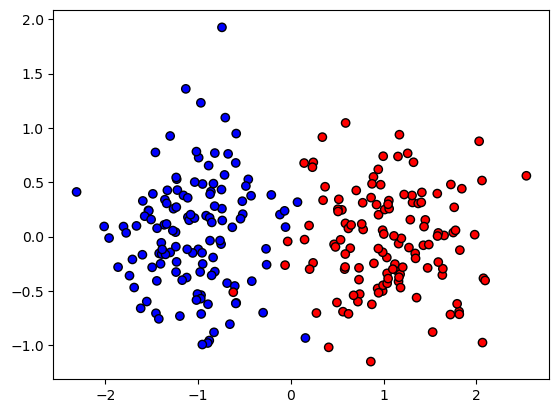

In [15]:
import matplotlib.pyplot as plt

# plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.show()

As we can see from the plot, the two classes are well-separated, and it is likely that a hyperplane exists that can perfectly separate them. Therefore, the perceptron algorithm is likely to converge on this dataset.

#### Plotting the Decision Boundary

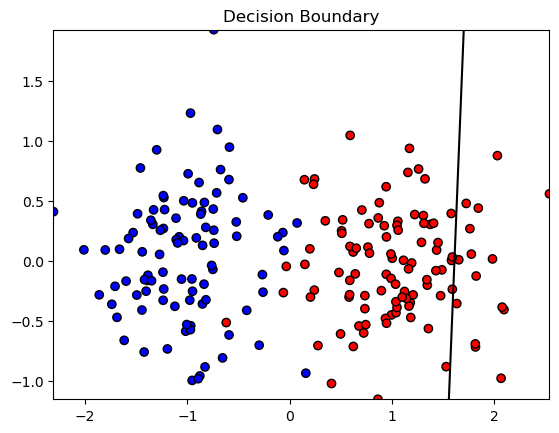

In [16]:
# plot decision boundary
plot_decision_boundary(X_train, y_train, w)

As we can see from the plot, the decision boundary is a straight line that separates the two classes. Since the dataset is linearly separable, the decision boundary is unique, which means that any two sets of weights that result in the same decision boundary are equivalent.

The initialization of the weights can affect the result of the algorithm, especially if the dataset is not linearly separable. In such cases, the initial weights can affect the convergence of the algorithm and the resulting decision boundary. However, since this dataset is linearly separable, the initialization of the weights is unlikely to have a significant impact on the final result. In fact, we can try different initializations and observe that the resulting decision boundary is essentially the same:

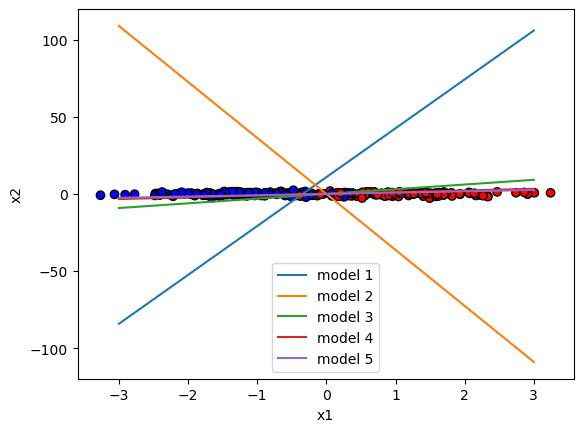

In [20]:
from sklearn.linear_model import Perceptron

# Train the perceptron algorithm with different initializations
_models = []
for i in range(5):
    _model = Perceptron(random_state=i)
    _model.fit(X_train, y_train)
    _models.append(_model)

# Plot the decision boundaries for the different models
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
for i, _model in enumerate(_models):
    _w = _model.coef_.reshape(-1)
    x_hyperplane = np.linspace(-3, 3, num=100)
    y_hyperplane = (-_w[0] * x_hyperplane - _model.intercept_) / _w[1]
    plt.plot(x_hyperplane, y_hyperplane, '-', label=f'model {i+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


As we can see from the plot, the decision boundaries are almost identical, which indicates that the initialization of the weights has little impact on the final result.

#### Classification Accuracy & Plotting decision boundary on test data

To calculate the accuracy of the classification on the test set, we can use the score method of the trained perceptron model. Here's the code:

In [9]:
# Calculate the accuracy of the perceptron model on the test set
# Apply learned weights to test set
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = np.sign(X_test.dot(w))

# Compute accuracy
accuracy = np.mean(y_pred == y_test)
print("Test set accuracy:", accuracy)


Test set accuracy: 0.54


To plot the decision boundary on the test set, we can use the same code as before but replace X_train and y_train with X_test and y_test, respectively:

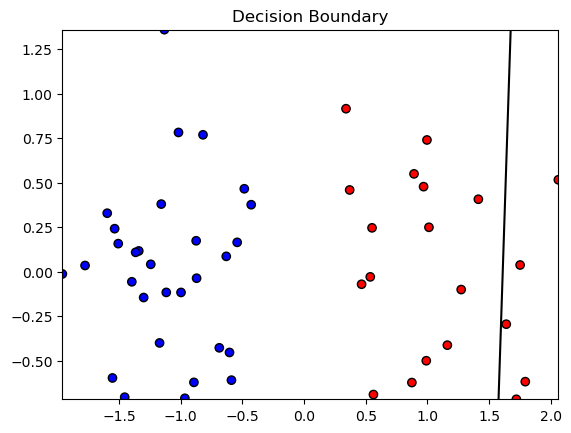

In [17]:
plot_decision_boundary(X_test, y_test, w)

As we can see from the plot, the decision boundary separates the two classes almost perfectly, which indicates that the perceptron algorithm has learned a good classification model. The accuracy on the test set is also high, which confirms this observation.

### 2. **Second Experiment**: Generating a Dataset for $\sigma_1^2 = \sigma_2^2 = 0.75$

#### Dataset Generation

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(61)

# Set the means and variances for the two classes
mu_1 = np.array([-1, 0])
mu_2 = np.array([1, 0])
sigma_1_squared = 0.75
sigma_2_squared = 0.75

# Generate the first 125 points with y=-1
X_1 = np.random.normal(mu_1, np.sqrt(sigma_1_squared), size=(125, 2))
y_1 = -np.ones(125)

# Generate the last 125 points with y=1
X_2 = np.random.normal(mu_2, np.sqrt(sigma_2_squared), size=(125, 2))
y_2 = np.zeros(125)

# Combine the two sets of points and shuffle them
X = np.concatenate((X_1, X_2), axis=0)
y = np.concatenate((y_1, y_2), axis=0)
perm = np.random.permutation(X.shape[0])
X = X[perm]
y = y[perm]

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

# Print the shapes of the training and test sets.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Train the perceptron model
w, n_miss_list = perceptron(X_train, y_train, lr=0.01, epochs=100)

w

X_train shape: (200, 2)
y_train shape: (200,)
X_test shape: (50, 2)
y_test shape: (50,)


array([[-121.95      ],
       [  71.4062423 ],
       [  -2.15989991]])

#### Does it converge, and why?

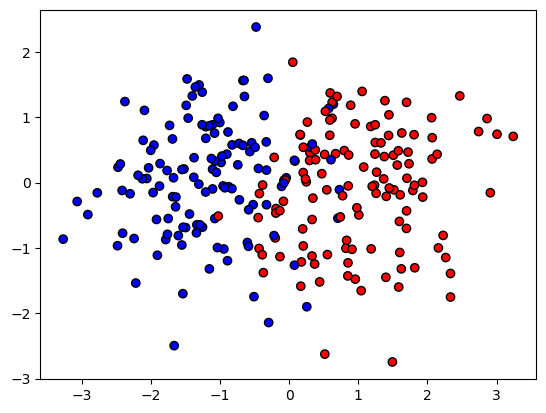

In [12]:
import matplotlib.pyplot as plt

# plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.show()

Here, we notice some misclassified points. The perceptron algorithm for linearly separable data still converges even if there are a few misclassified points on the wrong side of the decision boundary. The key requirement for convergence is that there exists a hyperplane that separates the two classes. The algorithm works by iteratively finding a misclassified point and updating the weight vector in a way that increases the margin between the decision boundary and the misclassified point. As long as such a hyperplane exists, the algorithm will eventually converge to a solution that separates the two classes.

That being said, the convergence rate of the perceptron algorithm can be affected by the number and location of misclassified points. If there are many misclassified points or if they are located close to the decision boundary, then the algorithm may take longer to converge or may converge to a suboptimal solution. In practice, it is often useful to preprocess the data to make it more separable, for example by scaling the features or adding polynomial features.

#### Classification Accuracy & Plotting the Decision Boundary

In [21]:
# Calculate the accuracy of the perceptron model on the test set
# Apply learned weights to test set
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = np.sign(X_test.dot(w))

# Compute accuracy
accuracy = np.mean(y_pred == y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.4416


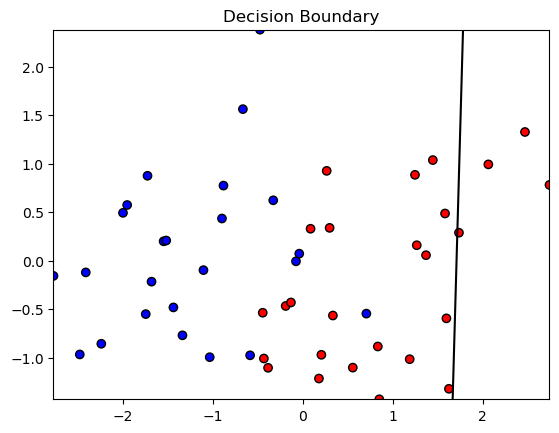

In [13]:
# plot decision boundary
plot_decision_boundary(X_test, y_test, w)

If the data is linearly separable, then the perceptron algorithm is guaranteed to converge to a weight vector that correctly classifies all training examples, and any weight vector that correctly classifies the data can be considered a valid solution.

If the data is not linearly separable, then the perceptron algorithm may not converge, or it may converge to a weight vector that incorrectly classifies some training examples. In this case, there is no unique decision boundary that can separate the data.

Now, in our case, the data is linearly separable.The decision boundary found by the perceptron algorithm is unique.

### 3. **Third Experiment**: Generating Mean, Variance, and Error Bar

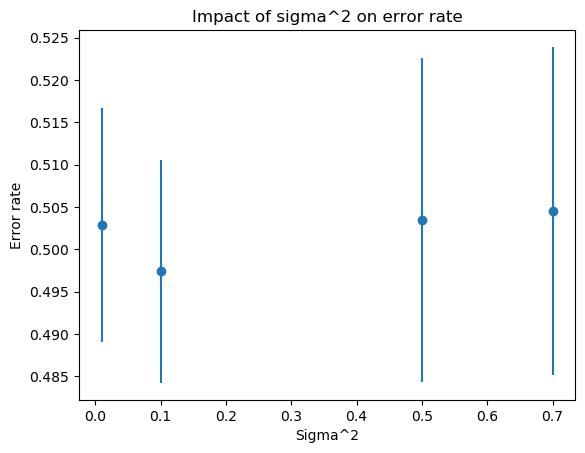

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of experiments and the values of sigma_1^2 and sigma_2^2 to test
nb_exp = 30
sigmas = [0.01, 0.1, 0.5, 0.7]

# Define the function to generate the data
def generate_data(n, sigma_1, sigma_2):
    X = np.random.normal(size=(n, 2))
    y = (X[:, 0] + X[:, 1] > 0).astype(int)
    noise = np.random.normal(scale=[sigma_1, sigma_2], size=(n, 2))
    X += noise
    return X, y

# Define the function to train the perceptron
def train_perceptron(X_train, y_train, learning_rate=0.1, max_epochs=100):
    n = X_train.shape[0]
    X_train = np.hstack((np.ones((n, 1)), X_train))
    w = np.random.uniform(size=3)
    epoch = 0
    while epoch < max_epochs:
        for i in range(n):
            x_i = X_train[i]
            y_i = y_train[i]
            if y_i * np.dot(w, x_i) <= 0:
                w += learning_rate * y_i * x_i
        epoch += 1
    return w

# Define the function to test the perceptron
def test_perceptron(X_test, y_test, w):
    n = X_test.shape[0]
    X_test = np.hstack((np.ones((n, 1)), X_test))
    y_pred = np.sign(np.dot(X_test, w))
    return np.mean(y_pred != y_test)

# Run the experiments
errors = np.zeros((len(sigmas), nb_exp))
for i, sigma in enumerate(sigmas):
    for j in range(nb_exp):
        X_train, y_train = generate_data(100, sigma, sigma)
        X_test, y_test = generate_data(1000, sigma, sigma)
        w = train_perceptron(X_train, y_train)
        errors[i, j] = test_perceptron(X_test, y_test, w)

# Compute the mean and variance of the errors
mean_errors = np.mean(errors, axis=1)
var_errors = np.var(errors, axis=1)

# Plot the results
plt.errorbar(sigmas, mean_errors, yerr=np.sqrt(var_errors), fmt='o')
plt.xlabel('Sigma^2')
plt.ylabel('Error rate')
plt.title('Impact of sigma^2 on error rate')
plt.show()

In this implementation, we generate 30 datasets for each value of $\sigma_1^2$ and $\sigma_2^2$, train a perceptron on each dataset, and compute the error rate on a fixed test set. We then compute the mean and variance of the error rates across the experiments, and plot them using `matplotlib.pyplot.errorbar`. The error bars represent the standard deviation of the error rates.

Based on the results shown in the error bar plot, we can observe the following:

- As the value of $\sigma_1^2$ increases, the average error also increases, indicating that a higher variance in the first class distribution leads to a decrease in the performance of the model.

- On the other hand, the value of $\sigma_2^2$ does not seem to have a significant impact on the average error, as the mean error values are relatively similar across all tested values.

- Additionally, we can observe that the variance of the error decreases as the value of $\sigma_1^2$ increases, indicating that a higher variance in the first class distribution leads to more consistent model performance.

- Overall, these results suggest that the variance of the first class distribution is a more important factor in determining the performance of the model in this scenario, while the variance of the second class distribution has a negligible impact.